In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./datasets/wiki_movie_plots_deduped.csv', encoding='utf-8')
display(df.head())
print(df.shape)

,Release Year,Title,Origin_Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


(25533, 8)


# Text standardization

In [2]:
import swifter
import spacy
nlp = spacy.load('en_core_web_md', disable=["tagger", "parser", "ner"])

In [3]:
def standardize_texts(text:str):
    doc = nlp(text)
    lemmatized_words = []
    for token in doc:
        if not token.is_stop:
            lemmatized_words.append(token.lemma_)
    return ' '.join(lemmatized_words)

In [ ]:
df['lemmatized_text'] = df.Plot.swifter.apply(standardize_texts)
df.head(10)

In [6]:
df.to_csv('./datasets/wiki_movie_plots_deduped.csv', encoding='utf-8', index=False)

# Text preprocessing

In [7]:
import tensorflow as tf

## Keras tokenizers

In [10]:
tok = tf.keras.preprocessing.text.Tokenizer(num_words=1000,
                                            filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r'
                                           )
tok.fit_on_texts(df.lemmatized_text.to_list())
tok.word_index.keys()

dict_keys(['find', 'leave', 'kill', 'tell', 'man', 'take', 'go', 'return', 'try', 'father', 'meet', 'new', 'home', 'friend', 'love', 'time', 'come', 'house', 'day', 'help', 'work', 'family', "'", 'get', 'late', 'police', 'life', 'begin', 'arrive', 'reveal', 'end', 'see', 'year', 'escape', 'mother', 'film', 'discover', 'wife', 'decide', 'give', 'live', 'attempt', 'woman', 'run', 'young', 'shoot', 'ask', 'fall', 'night', 'away', 'old', 'marry', 'know', 'want', 'son', 'car', 'death', 'turn', 'plan', 'money', 'child', 'way', 'force', 'attack', 'learn', 'lead', 'order', 'make', 'daughter', 'break', 'fight', 'girl', 'say', 'call', 'murder', 'brother', 'follow', 'play', 'send', 'head', 'name', 'start', 'die', 'john', 'town', 'set', 'tom', 'realize', 'school', 'have', 'soon', 'room', 'visit', 'believe', 'group', 'bring', 'refuse', 'eventually', 'use', 'steal', 'jack', 'cause', 'look', 'boy', 'story', 'lose', 'drive', 'stop', 'offer', 'show', 'agree', 'save', 'place', 'fire', 'city', 'finally',

# Use Glove Word Embedding matrix

In [19]:
import numpy as np
from typing import Tuple, Dict

def load_glove_vectors(glove_path:str,
                       word_index: dict
                       ) -> Tuple[Dict, np.ndarray, int]:
    '''
    

    Parameters
    ----------
    glove_path : str
        The path of glove vector file.
    word_index : dict
        The word index of words in vocabulary.
        Format: Ideally Keras Tokenizer generates word indices by ranking them
        in descending order of counts in corpus
        {'word1':rank_word1,
         'word2':rank_word2
         }

    Returns
    -------
    embeddings_index : Dict
        Dictionary in the form {'word1':np.ndarray(embedding_vector1)}.
    embedding_matrix : np.ndarray
        Numpy array with shape (v+1,e)
        where v = number of words in vocabulary
        e = embedding dimension
    embedding_dim : int
        The embedding dimension of the word vectors

    '''
    # to return embeddings_index, embedding_matrix
    embeddings_index = {}
    f = open(glove_path, encoding='utf-8')
    for line in f:
        values = line.split()
        try:
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except Exception as e:
            print('Exception: {}'.format(e))
            print(values)
    f.close()
    embedding_dim = list(embeddings_index.values())[0].shape[0]
    embedding_matrix = np.zeros((len(word_index)+1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    
    print('Info: Dimensionality of word vector: {}'.format(embedding_dim))
    return embeddings_index, embedding_matrix, embedding_dim

In [21]:
glove_path = r'./binary_files/wiki_movie_plots_deduped_wv.txt'
word_index = tok.word_index
embeddings_index, embedding_matrix, embedding_dim = load_glove_vectors(glove_path, word_index)

Exception: list index out of range
[]
Exception: list index out of range
[]
Exception: list index out of range
[]
Exception: list index out of range
[]
Exception: list index out of range
[]
Exception: list index out of range
[]
Exception: could not convert string to float: 'Carolina'
['North', 'Carolina', '0.033768125', '-0.039787393', '-0.022100205', '-0.034593377', '0.022475097', '-0.005387376', '0.040582005', '-0.043937635', '0.030495461', '-0.021029612', '0.027951593', '-0.003621839', '0.009207592', '-0.031464167', '0.009834683', '0.013946659', '-0.008698949', '-0.045665763', '0.06386175', '-0.040186834', '-0.035190493', '0.016219988', '-0.043572012', '-0.016223334', '-0.043316685', '0.06629575', '-0.054519236', '0.0015119807', '0.03664311', '-0.021009905', '-0.054067027', '0.013953987', '0.07653193', '-0.038006406', '-0.0036162368', '-0.0386892', '0.015594657', '-0.042996682', '0.02985089', '0.016963912', '-0.013369506', '-0.053379912', '-4.0867948e-05', '-0.060057532', '-0.000190

In [32]:
print(embeddings_index.get('lady'))

[-0.00561318 -0.13082696 -1.365869   -1.2259861   0.68239206 -1.3055526
  0.24460384  0.571603   -0.2791666  -0.72126955  0.27460146 -0.8126264
  1.4097128   0.24164878 -0.37898317  1.2622948   0.8544992  -0.03612792
  0.03848059  0.28289744  0.4590925   0.6415451   0.04483616 -1.0256765
 -2.5724418   0.8629939  -2.5976028  -0.10801682  0.7126207   0.59370697
  0.605573    0.43182346  1.1459914   0.43510658 -1.3864263  -0.66840345
 -1.3299152   2.1862261   0.4139657   1.5141381   0.88460284 -0.4038391
  0.505134   -0.7516593   0.20302567 -0.91644114 -0.1602382  -0.4148878
  1.0577598   0.7944414   1.2780714  -1.0898074   1.665513   -0.6499619
 -0.5674459  -0.6623922   0.19906303 -1.8862411  -0.16816677  0.3293442
  0.02024254  3.0125837   1.7309161  -0.66932744  0.02263935 -1.1882313
  0.21843384  0.6558888  -0.09659814 -1.2991709   0.27764207 -0.24943574
  0.9066344   1.5641333   0.02791482 -0.13499223  0.9440651  -0.35274604
  0.22341855 -2.378278   -2.3352692   0.00489447  0.476001 

# Create the X matrix

In [86]:
max_sequence_length = 50
sequences = tok.texts_to_sequences(df.Plot.to_list())
print('Some sequences:::')
print(sequences[0:2])
X = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_sequence_length)
print('Sequences padded:::')
print(X[0])

Some sequences:::
[[235, 880, 5, 80, 95, 28, 384, 958, 299, 168, 95, 145, 67, 2, 491], [168, 438, 49, 45, 224, 330, 65, 103, 625, 597, 169, 5, 43, 32]]
Sequences padded:::
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 235
 880   5  80  95  28 384 958 299 168  95 145  67   2 491]


# Create the y vector

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df.Origin_Ethnicity)
y = y.reshape(len(y),1)
le.classes_

array(['American', 'Assamese', 'Australian', 'Bangladeshi', 'Bengali',
       'Bollywood', 'British', 'Canadian', 'Chinese', 'Egyptian',
       'Filipino', 'Hong Kong'], dtype=object)

# Create the model pieces

## Convolution layers

In [112]:
import keras
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    len(word_index)+1,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)
inputs = keras.layers.Input(shape=(max_sequence_length,), dtype="int32")
vocab_size = len(word_index) + 1
x = keras.layers.Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False
                    )(inputs)
# Add 2 bidirectional LSTMs
x = keras.layers.Conv1D(32,kernel_size=8)(x)
x = keras.layers.MaxPool1D(2)(x)
x = keras.layers.Conv1D(32,kernel_size=8)(x)
x = keras.layers.MaxPool1D(2)(x)
# Add a classifier
outputs = keras.layers.Dense(len(le.classes_), activation='softmax')(x)
model = keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 50)                0         
_________________________________________________________________
embedding_23 (Embedding)     (None, 50, 100)           9520700   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 43, 32)            25632     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 21, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 14, 32)            8224      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 7, 12)             396

## RNN

In [146]:
import keras
from tensorflow.keras.layers import Embedding
inputs = keras.layers.Input(shape=(max_sequence_length,), dtype="int32")
vocab_size = len(word_index) + 1
x = keras.layers.Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False
                    )(inputs)
# Add 2 bidirectional LSTMs
x = keras.layers.GRU(64, return_sequences=True)(x)
x = keras.layers.GRU(32, return_sequences=False)(x)
# Add a classifier
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(len(le.classes_), activation='softmax')(x)
model = keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        (None, 50)                0         
_________________________________________________________________
embedding_46 (Embedding)     (None, 50, 100)           9520700   
_________________________________________________________________
gru_35 (GRU)                 (None, 50, 64)            31680     
_________________________________________________________________
gru_36 (GRU)                 (None, 32)                9312      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_30 (Dense)             (None, 12)                1548      
Total params: 9,567,464
Trainable params: 46,764
Non-trainable params: 9,520,700
___________________________________________

# Compile the model

In [147]:
from keras.models import Model
model = Model(inputs, outputs)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

# Train the model

In [148]:
from keras.callbacks import EarlyStopping

In [149]:
es = EarlyStopping(patience=10,verbose=1)
model.fit(X, 
          tf.keras.utils.to_categorical(y),
          batch_size=20,epochs=100,validation_split=0.3,
          callbacks = [es],
          shuffle=True
         )

Train on 17873 samples, validate on 7660 samples
Epoch 1/100
17873/17873 [==============================] - 33s 2ms/step - loss: 0.1499 - acc: 0.9707 - val_loss: 11.5817 - val_acc: 0.0000e+00
Epoch 2/100
17873/17873 [==============================] - 33s 2ms/step - loss: 0.1172 - acc: 0.9723 - val_loss: 12.6085 - val_acc: 0.0000e+00
Epoch 3/100
17873/17873 [==============================] - 33s 2ms/step - loss: 0.1082 - acc: 0.9723 - val_loss: 13.2869 - val_acc: 0.0000e+00
Epoch 4/100
17873/17873 [==============================] - 33s 2ms/step - loss: 0.0969 - acc: 0.9726 - val_loss: 13.6864 - val_acc: 0.0000e+00
Epoch 5/100
17873/17873 [==============================] - 33s 2ms/step - loss: 0.0759 - acc: 0.9763 - val_loss: 14.3455 - val_acc: 1.3055e-04
Epoch 6/100
17873/17873 [==============================] - 33s 2ms/step - loss: 0.0514 - acc: 0.9828 - val_loss: 18.2231 - val_acc: 0.0000e+00
Epoch 7/100
17873/17873 [==============================] - 33s 2ms/step - loss: 0.0306 - acc:

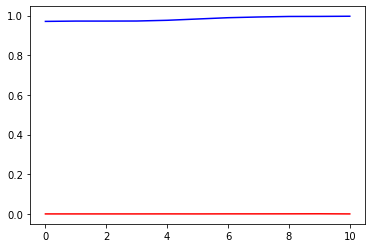

In [150]:
import matplotlib.pyplot as plt
x = model.history.epoch
y_train = model.history.history['acc']
y_test = model.history.history['val_acc']
plt.plot(x, y_train, color='blue')
plt.plot(x, y_test, color='red')
plt.show()

In [77]:
model.get_output_at(0)

<tf.Tensor 'dense_9/Softmax:0' shape=(None, 12) dtype=float32>